In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
# Load the data from the uploaded file
# Make sure to upload 'ratings_small.csv' using the Kaggle interface
data_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
movie_ratings = pd.read_csv(data_path)
movie_ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate

# Load the data from the uploaded file
file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
data_reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
movie_dataset = Dataset.load_from_file(file_path, reader=data_reader)

# Define the algorithms and their configurations
algorithms = {
    'Probabilistic Matrix Factorization': (SVD(biased=False), {}),
    'User-based Collaborative Filtering': (KNNBasic(sim_options={'user_based': True}), {}),
    'Item-based Collaborative Filtering': (KNNBasic(sim_options={'user_based': False}), {})
}

# Define a function to evaluate algorithm performance
def evaluate_algorithm_performance(algorithm, dataset):
    # Perform cross-validation and compute MAE, RMSE
    cv_results = cross_validate(algorithm, dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    avg_mae = cv_results['test_mae'].mean()
    avg_rmse = cv_results['test_rmse'].mean()
    return avg_mae, avg_rmse


# Define variables to store the MAE and RMSE for each algorithm
pmf_mae_val = pmf_rmse_val = user_cf_mae_val = user_cf_rmse_val = item_cf_mae_val = item_cf_rmse_val = None

# Evaluate algorithm performance and assign values to variables
for algo_name, (algo, config) in algorithms.items():
    # Evaluate algorithm performance
    mae, rmse = evaluate_algorithm_performance(algo, movie_dataset)
    
    # Assign values based on algorithm name
    if algo_name == 'Probabilistic Matrix Factorization':
        pmf_mae_val, pmf_rmse_val = mae, rmse
    elif algo_name == 'User-based Collaborative Filtering':
        user_cf_mae_val, user_cf_rmse_val = mae, rmse
    elif algo_name == 'Item-based Collaborative Filtering':
        item_cf_mae_val, item_cf_rmse_val = mae, rmse

    # Print the results
    print(f'{algo_name} - MAE: {mae}, RMSE: {rmse}')

# Check the assigned values
print("PMF MAE:", pmf_mae_val)
print("PMF RMSE:", pmf_rmse_val)
print()
print("User CF MAE:", user_cf_mae_val)
print("User CF RMSE:", user_cf_rmse_val)
print()
print("Item CF MAE:", item_cf_mae_val)
print("Item CF RMSE:", item_cf_rmse_val)




Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7869  0.7771  0.7821  0.7765  0.7803  0.7806  0.0038  
RMSE (testset)    1.0154  1.0064  1.0091  1.0054  1.0110  1.0095  0.0036  
Fit time          1.02    1.01    1.10    1.04    1.03    1.04    0.03    
Test time         0.10    0.19    0.10    0.10    0.20    0.14    0.05    
Probabilistic Matrix Factorization - MAE: 0.7805562013330924, RMSE: 1.0094564175884726
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Me

In [12]:
# Define a dictionary to store the results for each algorithm
algorithm_results = {
    'User-based Collaborative Filtering': {'MAE': user_cf_mae_val, 'RMSE': user_cf_rmse_val},
    'Item-based Collaborative Filtering': {'MAE': item_cf_mae_val, 'RMSE': item_cf_rmse_val},
    'Probabilistic Matrix Factorization': {'MAE': pmf_mae_val, 'RMSE': pmf_rmse_val}
}

# Print the mean results for each algorithm
for algo_name, results in algorithm_results.items():
    print(f'{algo_name} - Mean MAE: {results["MAE"]}, Mean RMSE: {results["RMSE"]}')

# Compare the models based on RMSE and MAE
min_mae_algo = min(algorithm_results, key=lambda x: algorithm_results[x]['MAE'])
min_rmse_algo = min(algorithm_results, key=lambda x: algorithm_results[x]['RMSE'])

print("\nComparison:")
print(f"{min_mae_algo} has the minimum MAE.")
print(f"{min_rmse_algo} has the minimum RMSE.")


User-based Collaborative Filtering - Mean MAE: 0.7454199768252256, Mean RMSE: 0.9699493725959965
Item-based Collaborative Filtering - Mean MAE: 0.7210884783614591, Mean RMSE: 0.9353435301564718
Probabilistic Matrix Factorization - Mean MAE: 0.7805562013330924, Mean RMSE: 1.0094564175884726

Comparison:
Item-based Collaborative Filtering has the minimum MAE.
Item-based Collaborative Filtering has the minimum RMSE.


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7668  0.7646  0.7657  0.7743  0.7692  0.7681  0.0035  
RMSE (testset)    0.9927  0.9909  0.9913  1.0036  0.9941  0.9945  0.0047  
Fit time          0.24    0.24    0.24    0.29    0.21    0.24    0.02    
Test time         1.30    1.45    1.30    1.45    1.20    1.34    0.10    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

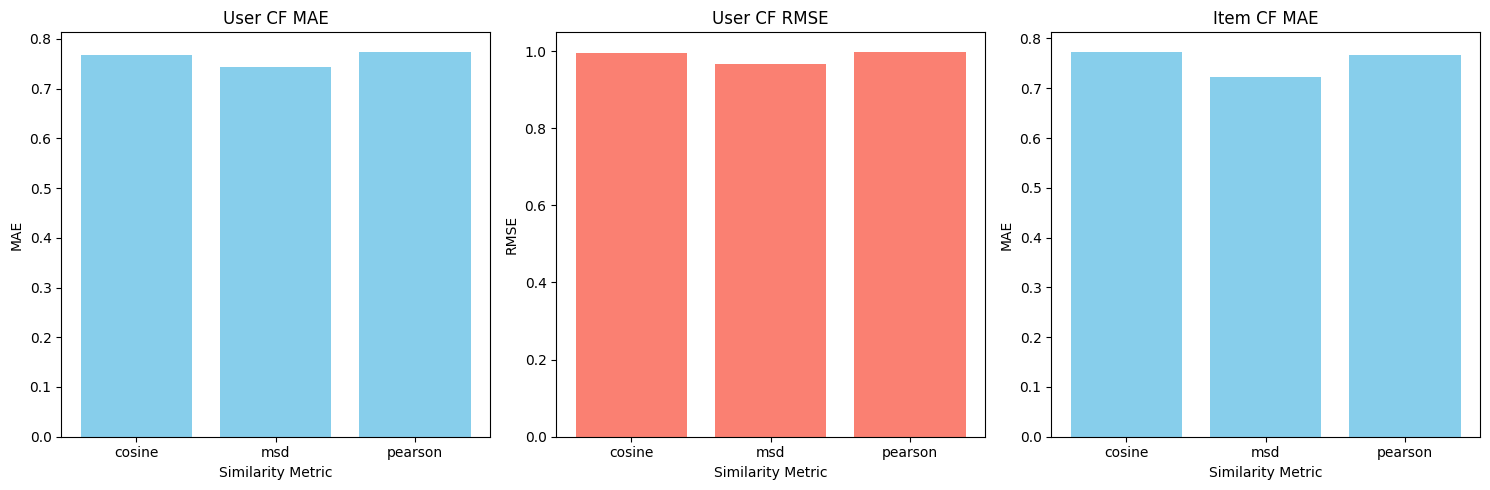

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader

# Load the data from the uploaded file
file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

# Define similarity metrics
similarity_metrics = ['cosine', 'msd', 'pearson']

# Create empty lists to store results
user_cf_maes = []
user_cf_rmses = []
item_cf_maes = []
item_cf_rmses = []

# Define a function to evaluate algorithm performance
def evaluate_algorithm(algo, data):
    cross_validate_results = cross_validate(algo, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    avg_mae = np.mean(cross_validate_results['test_mae'])
    avg_rmse = np.mean(cross_validate_results['test_rmse'])
    return avg_mae, avg_rmse

# Iterate over similarity metrics
for metric in similarity_metrics:
    # User-based Collaborative Filtering
    user_cf = KNNBasic(sim_options={'user_based': True, 'name': metric})
    user_cf_mae, user_cf_rmse = evaluate_algorithm(user_cf, data)
    user_cf_maes.append(user_cf_mae)
    user_cf_rmses.append(user_cf_rmse)

    # Item-based Collaborative Filtering
    item_cf = KNNBasic(sim_options={'user_based': False, 'name': metric})
    item_cf_mae, item_cf_rmse = evaluate_algorithm(item_cf, data)
    item_cf_maes.append(item_cf_mae)
    item_cf_rmses.append(item_cf_rmse)

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].bar(similarity_metrics, user_cf_maes, color='skyblue')
axes[0].set_title('User CF MAE')
axes[0].set_xlabel('Similarity Metric')
axes[0].set_ylabel('MAE')

axes[1].bar(similarity_metrics, user_cf_rmses, color='salmon')
axes[1].set_title('User CF RMSE')
axes[1].set_xlabel('Similarity Metric')
axes[1].set_ylabel('RMSE')

axes[2].bar(similarity_metrics, item_cf_maes, color='green')
axes[2].set_title('Item CF MAE')
axes[2].set_xlabel('Similarity Metric')
axes[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7548  0.7542  0.7529  0.7554  0.7553  0.7545  0.0009  
RMSE (testset)    0.9904  0.9829  0.9823  0.9878  0.9857  0.9858  0.0030  
Fit time          0.14    0.17    0.17    0.17    0.15    0.16    0.01    
Test time         1.05    0.89    0.97    1.00    0.95    0.97    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

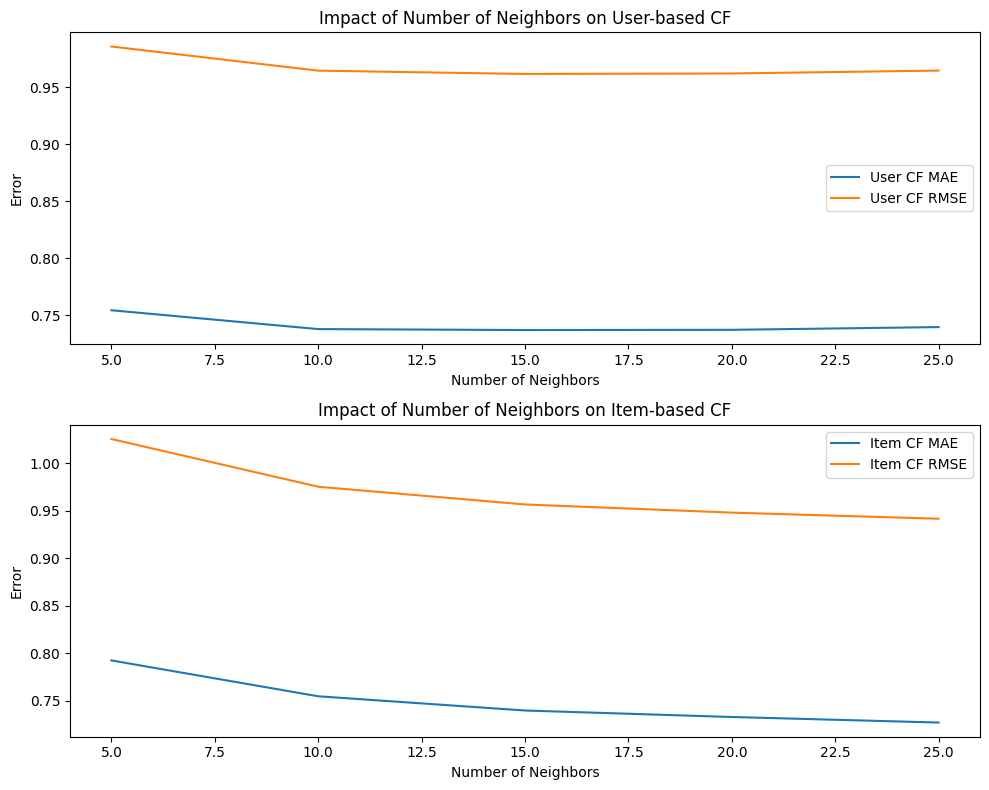

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader

# Load the data from the uploaded file
file_path = '/kaggle/input/the-movies-dataset/ratings_small.csv'
data_reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
movie_dataset = Dataset.load_from_file(file_path, reader=data_reader)

# Define the list of number of neighbors
num_neighbors_list = [5, 10, 15, 20, 25]

# Create empty lists to store results
user_cf_results = {'Mean Absolute Error': [], 'Root Mean Squared Error': []}
item_cf_results = {'Mean Absolute Error': [], 'Root Mean Squared Error': []}

# Define a function to evaluate algorithm performance
def evaluate_algorithm_performance(algorithm, dataset):
    cross_validate_results = cross_validate(algorithm, dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)
    avg_mae = np.mean(cross_validate_results['test_mae'])
    avg_rmse = np.mean(cross_validate_results['test_rmse'])
    return avg_mae, avg_rmse

# Iterate over the number of neighbors
for num_neighbors in num_neighbors_list:
    # User-based Collaborative Filtering
    user_cf = KNNBasic(k=num_neighbors, sim_options={'user_based': True})
    user_cf_mae, user_cf_rmse = evaluate_algorithm_performance(user_cf, movie_dataset)
    user_cf_results['Mean Absolute Error'].append(user_cf_mae)
    user_cf_results['Root Mean Squared Error'].append(user_cf_rmse)

    # Item-based Collaborative Filtering
    item_cf = KNNBasic(k=num_neighbors, sim_options={'user_based': False})
    item_cf_mae, item_cf_rmse = evaluate_algorithm_performance(item_cf, movie_dataset)
    item_cf_results['Mean Absolute Error'].append(item_cf_mae)
    item_cf_results['Root Mean Squared Error'].append(item_cf_rmse)

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# User-based Collaborative Filtering
axes[0].plot(num_neighbors_list, user_cf_results['Mean Absolute Error'], label='User CF MAE')
axes[0].plot(num_neighbors_list, user_cf_results['Root Mean Squared Error'], label='User CF RMSE')
axes[0].set_title('Impact of Number of Neighbors on User-based CF')
axes[0].set_xlabel('Number of Neighbors')
axes[0].set_ylabel('Error')
axes[0].legend()

# Item-based Collaborative Filtering
axes[1].plot(num_neighbors_list, item_cf_results['Mean Absolute Error'], label='Item CF MAE')
axes[1].plot(num_neighbors_list, item_cf_results['Root Mean Squared Error'], label='Item CF RMSE')
axes[1].set_title('Impact of Number of Neighbors on Item-based CF')
axes[1].set_xlabel('Number of Neighbors')
axes[1].set_ylabel('Error')
axes[1].legend()

plt.tight_layout()
plt.show()


In [19]:
# Define a range of neighbors
param_grid = {'number_of_neighbors': [5, 10, 15, 20, 25]}

# User-based Collaborative Filtering
user_cf_results = {'Root Mean Squared Error': []}
item_cf_results = {'Root Mean Squared Error': []}

# Iterate over the number of neighbors
for k in param_grid['number_of_neighbors']:
    # User-based Collaborative Filtering
    user_cf = KNNBasic(k=k, sim_options={'user_based': True})
    user_cf_mae, user_cf_rmse = evaluate_algorithm(user_cf, data)
    user_cf_results['Root Mean Squared Error'].append(user_cf_rmse)

    # Item-based Collaborative Filtering
    item_cf = KNNBasic(k=k, sim_options={'user_based': False})
    item_cf_mae, item_cf_rmse = evaluate_algorithm(item_cf, data)
    item_cf_results['Root Mean Squared Error'].append(item_cf_rmse)

# Find the best number of neighbors for User-based Collaborative Filtering
best_k_user_cf = param_grid['number_of_neighbors'][np.argmin(user_cf_results['Root Mean Squared Error'])]

# Find the best number of neighbors for Item-based Collaborative Filtering
best_k_item_cf = param_grid['number_of_neighbors'][np.argmin(item_cf_results['Root Mean Squared Error'])]

# Print the results
print(f'Best number of neighbors for User-based Collaborative Filtering: {best_k_user_cf}')
print(f'Best number of neighbors for Item-based Collaborative Filtering: {best_k_item_cf}')

# Check if the best number of neighbors values are the same
if best_k_user_cf == best_k_item_cf:
    print("The best number of neighbors for both User-based and Item-based Collaborative Filtering is the same.")
else:
    print("The best number of neighbors for User-based and Item-based Collaborative Filtering differs.")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7496  0.7572  0.7593  0.7478  0.7597  0.7547  0.0050  
RMSE (testset)    0.9797  0.9869  0.9922  0.9782  0.9959  0.9866  0.0069  
Fit time          0.14    0.13    0.16    0.17    0.16    0.15    0.01    
Test time         1.13    0.97    1.00    1.00    1.00    1.02    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s